## Import modules. Remember it is always good practice to do this at the beginning of a notebook.

If you don't have seaborn, you can install it with conda install seaborn

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Use notebook magic to render matplotlib figures inline with notebook cells.

In [4]:
%matplotlib inline

Let's begin!

We'll use pandas read_csv function to read in our data.

In [8]:
df = pd.read_csv('/Users/sabiha/PhD/Courses/DS/HCEPDB_moldata.csv')

Let's take a look at the data to make sure it looks right with head, and then look at the shape of the dataframe

In [9]:
df.shape

(2322849, 11)

In [10]:
df_sample = df.sample(frac=0.01)

That's a lot of data. Let's take a random subsampling of the full dataframe to make playing with the data faster. This is something you may consider doing when you have large datasets and want to do data exploration. Pandas has a built-in method called sample that will do this for you.

We can use this to try some of our plotting functions. We will start with two variables in the dataset, PCE and HOMO energy. 

There are multiple packages you can use for plotting. Pandas has some built-in object-oriented methods we can try first.

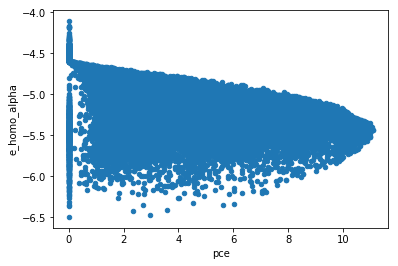

In [11]:
df_sample.plot.scatter('pce','e_homo_alpha')

Oops! We used the wrong dataset. The full dataset took a while to plot. We can use %%timeit to see how long that took.

Note that %%timeit repeats the function call a number of times and averages it. You can alter this behavior by changing the defaults. Let's see how long it takes to plot our subsample:

That's a lot quicker! It doesn't scale perfectly with datasize (plotting took about 1/5 of the time with 1/10 of the data) likely due to code overhead. 

But the default plot settings are pretty ugly. We can take advantage of the object-oriented nature of pandas plots to modify the output.

Text(0.5,1,'Photoconversion Efficiency vs. HOMO Energy')

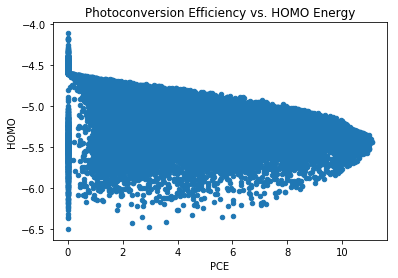

In [12]:
p_v_hplot = df_sample.plot.scatter('pce', 'e_homo_alpha')
p_v_hplot.set_xlabel('PCE')
p_v_hplot.set_ylabel('HOMO')
p_v_hplot.set_title('Photoconversion Efficiency vs. HOMO Energy')

That's a bit butter, but we can still make improvements, like adding gridlines, making the y-axis label more accurate, increasing size, and adjusting the aspect ratio.

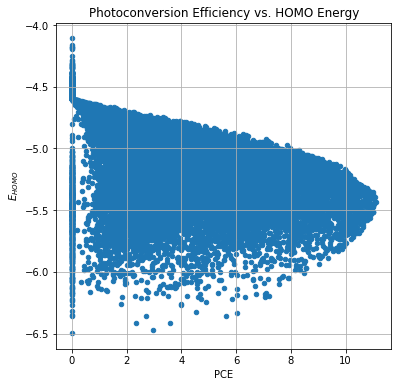

In [14]:
p_v_hplot = df_sample.plot.scatter('pce', 'e_homo_alpha', figsize=(6,6))
p_v_hplot.set_xlabel('PCE')
p_v_hplot.set_ylabel('$E_{HOMO}$')
p_v_hplot.set_title('Photoconversion Efficiency vs. HOMO Energy')
p_v_hplot.grid()

Note that we used LaTeX notation to create the subscript text. LaTeX can be used to generate mathematical expressions, symbols, and Greek letters for figures. One reference guide is included here: https://www.overleaf.com/learn/latex/Subscripts_and_superscripts

Take a moment to try to figure out the following using the pandas documentation:
* How to change the x range to be 2 to 10
* How to change the y range to be -6 to 2
* How to change the font size to 18
* how to change the colors and transparency.

You can access the documentation [here](https://pandas.pydata.org/pandas-docs/stable/visualization.html).

(-6, 2)

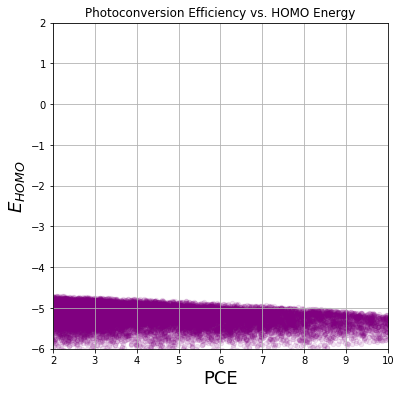

In [20]:
p_v_hplot = df_sample.plot.scatter('pce', 'e_homo_alpha', figsize=(6,6),s = 20, alpha=0.1, c = 'purple')
p_v_hplot.set_xlabel('PCE', size = 18)
p_v_hplot.set_ylabel('$E_{HOMO}$', size = 18)
p_v_hplot.set_title('Photoconversion Efficiency vs. HOMO Energy')
p_v_hplot.grid()
plt.xlim([2, 10])
plt.ylim([-6, 2])

### An aside: Matplotlib can also be used to plot datasets in a similar fashion

Pandas visualization toolbox is a convenience feature built on top of Matplotlib.

Note that pandas can also be used like matplotlib to create subplots. It just has a slightly different notation:

### Back to pandas: Quick dataset exploration tools

A very useful tool for quickly exploring relationships between variables in a dataset is the built-in pandas scatterplot matrix:

That's a lot of information in one figure! Note the funky id plot at the left. IDs are the molecule ids and don't contain any useful information. Let's make that a column index before moving on.

OK, let's move on to density plots. These show the probability density of particular values for a variable. Notice how we used an alternate way of specifying plot type.

We can plot two different visualizations on top of each other, for instance, the density plot and a histogram plot. Since the density plot has a different y axis than the density plot, make sure to use a secondary y axis

### Alternate plot styles

As pandas is built on Matplotlib, you can use Matplotlib to alter then plot style. Styles are essentially a set of defaults for the plot appearance, so you don't have to modify them all yourselves. Let's try the ggplot style that mimics the ggplot2 style output from R.

You can find the list of matplotlib styles [here](https://tonysyu.github.io/raw_content/matplotlib-style-gallery/gallery.html)

### Seaborn improvements

Matplotlib can be used to create publication-quality images, but has some limitations-- including capabilities with 3D plots. There's another package Seaborn, that has a lot of built-in styles for very high-quality plots. Let's take a look at some of the options available:

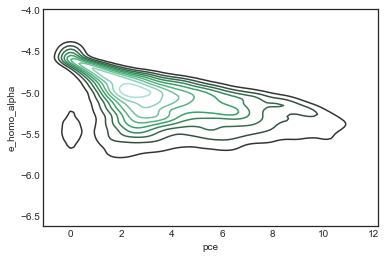

In [21]:
sns.set_style('white')
sns.kdeplot(df_sample['pce'],df_sample['e_homo_alpha'])

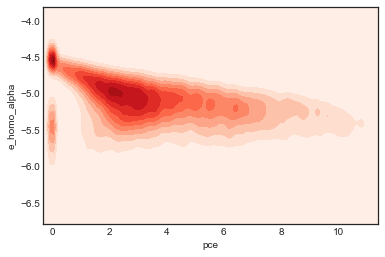

In [23]:
sns.kdeplot(df_sample['pce'],df_sample['e_homo_alpha'],cmap='Reds', shade=True, bw=0.1)

### In class exercise

Fix the above subplots so they aren't as shoddy. Add titles, increase font size, change colors and alpha, and change the margins and layout so they are side by side.